In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as msn
import seaborn as sns


In [2]:
df = pd.read_csv("weather_dataset.csv")
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [3]:
df.shape

(8784, 8)

In [4]:
df.columns

Index(['Date/Time', 'Temp_C', 'Dew Point Temp_C', 'Rel Hum_%',
       'Wind Speed_km/h', 'Visibility_km', 'Press_kPa', 'Weather'],
      dtype='object')

In [5]:
df.dtypes


,0
Date/Time,object
Temp_C,float64
Dew Point Temp_C,float64
Rel Hum_%,int64
Wind Speed_km/h,int64
Visibility_km,float64
Press_kPa,float64
Weather,object


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date/Time         8784 non-null   object 
 1   Temp_C            8784 non-null   float64
 2   Dew Point Temp_C  8784 non-null   float64
 3   Rel Hum_%         8784 non-null   int64  
 4   Wind Speed_km/h   8784 non-null   int64  
 5   Visibility_km     8784 non-null   float64
 6   Press_kPa         8784 non-null   float64
 7   Weather           8784 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 549.1+ KB


In [7]:
###DataSet columns doesn,t have any nulls
df.index

RangeIndex(start=0, stop=8784, step=1)

In [8]:
#Showing Unique Values in Weather  Column
df['Weather'].unique()


array(['Fog', 'Freezing Drizzle,Fog', 'Mostly Cloudy', 'Cloudy', 'Rain',
       'Rain Showers', 'Mainly Clear', 'Snow Showers', 'Snow', 'Clear',
       'Freezing Rain,Fog', 'Freezing Rain', 'Freezing Drizzle',
       'Rain,Snow', 'Moderate Snow', 'Freezing Drizzle,Snow',
       'Freezing Rain,Snow Grains', 'Snow,Blowing Snow', 'Freezing Fog',
       'Haze', 'Rain,Fog', 'Drizzle,Fog', 'Drizzle',
       'Freezing Drizzle,Haze', 'Freezing Rain,Haze', 'Snow,Haze',
       'Snow,Fog', 'Snow,Ice Pellets', 'Rain,Haze', 'Thunderstorms,Rain',
       'Thunderstorms,Rain Showers', 'Thunderstorms,Heavy Rain Showers',
       'Thunderstorms,Rain Showers,Fog', 'Thunderstorms',
       'Thunderstorms,Rain,Fog',
       'Thunderstorms,Moderate Rain Showers,Fog', 'Rain Showers,Fog',
       'Rain Showers,Snow Showers', 'Snow Pellets', 'Rain,Snow,Fog',
       'Moderate Rain,Fog', 'Freezing Rain,Ice Pellets,Fog',
       'Drizzle,Ice Pellets,Fog', 'Drizzle,Snow', 'Rain,Ice Pellets',
       'Drizzle,Snow,Fog', 

In [9]:
#Showing number of unique values of each column
df.nunique()

,0
Date/Time,8784
Temp_C,533
Dew Point Temp_C,489
Rel Hum_%,83
Wind Speed_km/h,34
Visibility_km,24
Press_kPa,518
Weather,50


In [10]:
#Showing all values in data frame
df.count()

,0
Date/Time,8784
Temp_C,8784
Dew Point Temp_C,8784
Rel Hum_%,8784
Wind Speed_km/h,8784
Visibility_km,8784
Press_kPa,8784
Weather,8784


In [11]:
#Showing how many times of values appears in Weather Column
df['Weather'].value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


<Axes: >

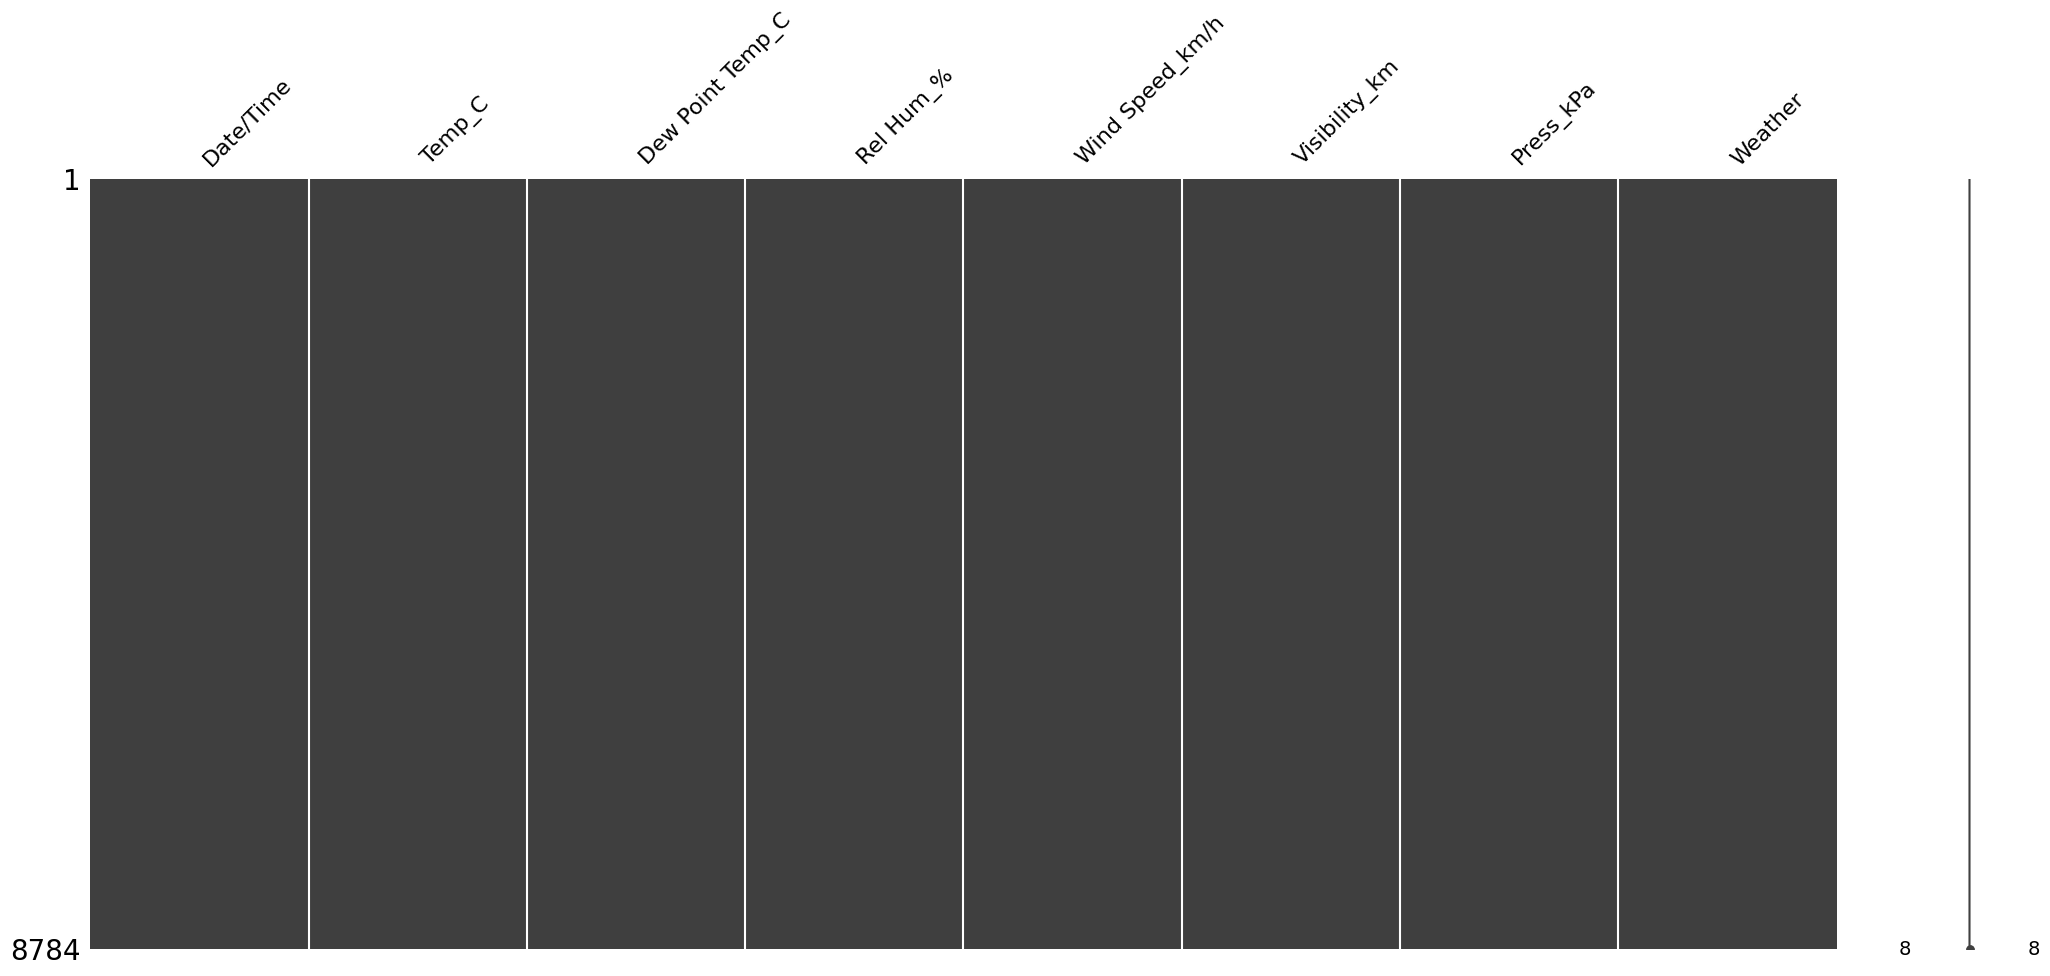

In [12]:
#Matrix That identify how many nulls in each column
msn.matrix(df)

In [13]:
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [14]:
#Showing number of unique values in Wind Speed_km/h Column
df['Wind Speed_km/h'].nunique()

34

In [15]:
df['Wind Speed_km/h'].unique()

array([ 4,  7,  6,  9, 15, 13, 20, 22, 19, 24, 30, 35, 39, 32, 33, 26, 44,
       43, 48, 37, 28, 17, 11,  0, 83, 70, 57, 46, 41, 52, 50, 63, 54,  2])

In [16]:
df.Weather.value_counts()

,count
Weather,
Mainly Clear,2106
Mostly Cloudy,2069
Cloudy,1728
Clear,1326
Snow,390
Rain,306
Rain Showers,188
Fog,150
"Rain,Fog",116


In [17]:
#Showing rows that wheather is Clear in it
df[df.Weather=='Clear']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
67,1/3/2012 19:00,-16.9,-24.8,50,24,25.0,101.74,Clear
114,1/5/2012 18:00,-7.1,-14.4,56,11,25.0,100.71,Clear
115,1/5/2012 19:00,-9.2,-15.4,61,7,25.0,100.80,Clear
116,1/5/2012 20:00,-9.8,-15.7,62,9,25.0,100.83,Clear
117,1/5/2012 21:00,-9.0,-14.8,63,13,25.0,100.83,Clear
...,...,...,...,...,...,...,...,...
8646,12/26/2012 6:00,-13.4,-14.8,89,4,25.0,102.47,Clear
8698,12/28/2012 10:00,-6.1,-8.6,82,19,24.1,101.27,Clear
8713,12/29/2012 1:00,-11.9,-13.6,87,11,25.0,101.31,Clear
8714,12/29/2012 2:00,-11.8,-13.1,90,13,25.0,101.33,Clear


In [18]:
#Show Rows that wind speed is 4 in it
df[df['Wind Speed_km/h']==4]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
96,1/5/2012 0:00,-8.8,-11.7,79,4,9.7,100.32,Snow
101,1/5/2012 5:00,-7.0,-9.5,82,4,4.0,100.19,Snow
146,1/7/2012 2:00,-8.1,-11.1,79,4,19.3,100.15,Cloudy
...,...,...,...,...,...,...,...,...
8768,12/31/2012 8:00,-8.6,-10.3,87,4,3.2,101.14,Snow Showers
8769,12/31/2012 9:00,-8.1,-9.6,89,4,2.4,101.09,Snow
8770,12/31/2012 10:00,-7.4,-8.9,89,4,6.4,101.05,"Snow,Fog"
8772,12/31/2012 12:00,-5.8,-7.5,88,4,12.9,100.78,Snow


In [19]:
#Rename Weather Column to Weather Condition
df.rename(columns={"Weather":"Weather_condition"},inplace = True)

In [20]:
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog


In [21]:
#Showing average values in Visibilty Columns
df['Visibility_km'].mean()

27.664446721311478

In [22]:
df.describe()

,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
std,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005
min,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000


In [23]:
#Calculatind standard deviation in pressure columns
df['Press_kPa'].std()


0.8440047459486474

In [24]:
#Calculating varience in humidity column
df['Rel Hum_%'].var()

286.2485501984998

In [25]:
#Showing all values that are Snow in Weather condition column



In [26]:
#Showing values that above 25 in wind speed and 25 in Visibilty column
df[(df['Wind Speed_km/h']>24 & (df['Visibility_km']==25))]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_condition
0,1/1/2012 0:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,1/1/2012 1:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,1/1/2012 2:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,1/1/2012 3:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,1/1/2012 4:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,12/31/2012 19:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,12/31/2012 20:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,12/31/2012 21:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,12/31/2012 22:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [27]:
df['Date/Time'] = pd.to_datetime(df['Date/Time'])


In [28]:
df

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_condition
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [29]:
###Show mean values of columns related to Weather_condition column (Categorical column )
df.groupby("Weather_condition").mean()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather_condition,,,,,,,
Clear,2012-06-25 18:03:12.760180992,6.825716,0.089367,64.497738,10.557315,30.153243,101.587443
Cloudy,2012-07-01 16:51:29.583333376,7.970544,2.375810,69.592593,16.127315,26.625752,100.911441
Drizzle,2012-09-17 15:00:00.000000000,7.353659,5.504878,88.243902,16.097561,17.931707,100.435366
"Drizzle,Fog",2012-06-30 00:44:15.000000000,8.067500,7.033750,93.275000,11.862500,5.257500,100.786625
"Drizzle,Ice Pellets,Fog",2012-12-17 09:00:00.000000000,0.400000,-0.700000,92.000000,20.000000,4.000000,100.790000
"Drizzle,Snow",2012-12-18 16:30:00.000000000,1.050000,0.150000,93.500000,14.000000,10.500000,100.890000
"Drizzle,Snow,Fog",2012-12-19 20:56:00.000000000,0.693333,0.120000,95.866667,15.533333,5.513333,99.281333
Fog,2012-06-24 21:08:00.000000000,4.303333,3.159333,92.286667,7.946667,6.248000,101.184067
Freezing Drizzle,2012-03-05 23:25:42.857142784,-5.657143,-8.000000,83.571429,16.571429,9.200000,100.202857


In [30]:
#Maximim and minimum values of each columns for  Weather_Condition
df.groupby("Weather_condition").max()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather_condition,,,,,,,
Clear,2012-12-30 20:00:00,32.8,20.4,99,33,48.3,103.63
Cloudy,2012-12-31 06:00:00,30.5,22.6,99,54,48.3,103.65
Drizzle,2012-12-22 01:00:00,18.8,17.7,96,30,25.0,101.56
"Drizzle,Fog",2012-12-19 10:00:00,19.9,19.1,100,28,9.7,102.07
"Drizzle,Ice Pellets,Fog",2012-12-17 09:00:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",2012-12-19 18:00:00,1.2,0.2,95,19,11.3,101.15
"Drizzle,Snow,Fog",2012-12-22 03:00:00,1.1,0.6,98,32,9.7,100.15
Fog,2012-12-29 10:00:00,20.8,19.6,100,22,9.7,103.04
Freezing Drizzle,2012-12-17 00:00:00,-2.3,-3.3,93,26,12.9,101.02


In [31]:
df.groupby("Weather_condition").min()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
Weather_condition,,,,,,,
Clear,2012-01-03 19:00:00,-23.3,-28.5,20,0,11.3,99.52
Cloudy,2012-01-01 17:00:00,-21.4,-26.8,18,0,11.3,98.39
Drizzle,2012-01-23 21:00:00,1.1,-0.2,74,0,6.4,97.84
"Drizzle,Fog",2012-01-23 20:00:00,0.0,-1.6,85,0,1.0,98.65
"Drizzle,Ice Pellets,Fog",2012-12-17 09:00:00,0.4,-0.7,92,20,4.0,100.79
"Drizzle,Snow",2012-12-17 15:00:00,0.9,0.1,92,9,9.7,100.63
"Drizzle,Snow,Fog",2012-12-18 21:00:00,0.3,-0.1,92,7,2.4,97.79
Fog,2012-01-01 00:00:00,-16.0,-17.2,80,0,0.2,98.31
Freezing Drizzle,2012-01-07 11:00:00,-9.0,-12.2,78,6,4.8,98.44


In [32]:
#Showing all records for weather is Fog
df.loc[df['Weather_condition'] == 'Fog']

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_condition
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
5,2012-01-01 05:00:00,-1.4,-3.3,87,9,6.4,101.27,Fog
6,2012-01-01 06:00:00,-1.5,-3.1,89,7,6.4,101.29,Fog
...,...,...,...,...,...,...,...,...
8716,2012-12-29 04:00:00,-16.0,-17.2,90,6,9.7,101.25,Fog
8717,2012-12-29 05:00:00,-14.8,-15.9,91,4,6.4,101.25,Fog
8718,2012-12-29 06:00:00,-13.8,-15.3,88,4,9.7,101.25,Fog
8719,2012-12-29 07:00:00,-14.8,-16.4,88,7,8.0,101.22,Fog


In [33]:
#Find all values if Weather is Cleat OR visibilty above 40
df[(df['Weather_condition']=='Clear')|(df['Visibility_km'])]

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_condition
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog
...,...,...,...,...,...,...,...,...
8779,2012-12-31 19:00:00,0.1,-2.7,81,30,9.7,100.13,Snow
8780,2012-12-31 20:00:00,0.2,-2.4,83,24,9.7,100.03,Snow
8781,2012-12-31 21:00:00,-0.5,-1.5,93,28,4.8,99.95,Snow
8782,2012-12-31 22:00:00,-0.2,-1.8,89,28,9.7,99.91,Snow


In [34]:
###Correlation between features
df.head()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_condition
0,2012-01-01 00:00:00,-1.8,-3.9,86,4,8.0,101.24,Fog
1,2012-01-01 01:00:00,-1.8,-3.7,87,4,8.0,101.24,Fog
2,2012-01-01 02:00:00,-1.8,-3.4,89,7,4.0,101.26,"Freezing Drizzle,Fog"
3,2012-01-01 03:00:00,-1.5,-3.2,88,6,4.0,101.27,"Freezing Drizzle,Fog"
4,2012-01-01 04:00:00,-1.5,-3.3,88,7,4.8,101.23,Fog


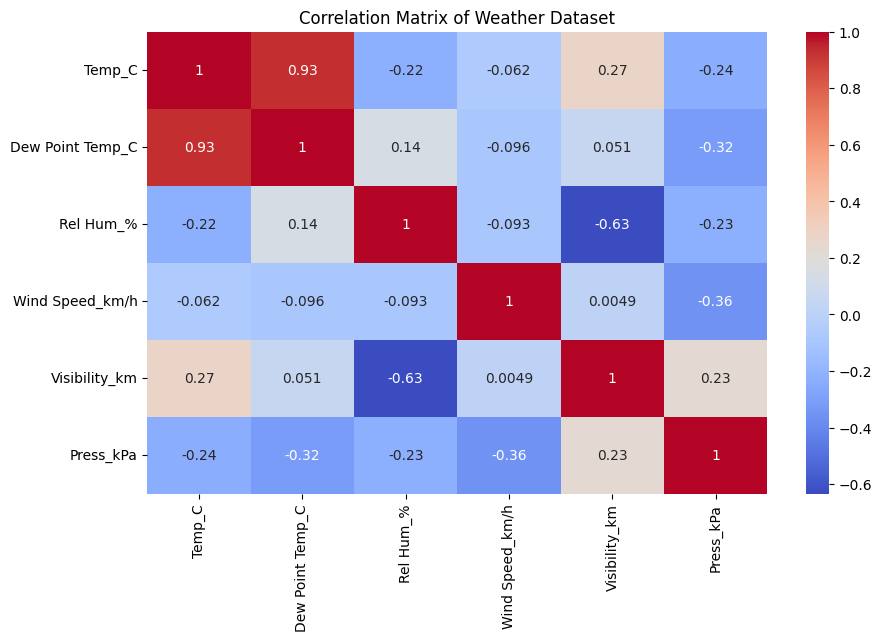

In [35]:
# Correlation between variable
numerical_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr = numerical_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Weather Dataset')
plt.show()

In [39]:
df.describe()

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa
count,8784,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000,8784.000000
mean,2012-07-01 23:30:00,8.798144,2.555294,67.431694,14.945469,27.664447,101.051623
min,2012-01-01 00:00:00,-23.300000,-28.500000,18.000000,0.000000,0.200000,97.520000
25%,2012-04-01 11:45:00,0.100000,-5.900000,56.000000,9.000000,24.100000,100.560000
50%,2012-07-01 23:30:00,9.300000,3.300000,68.000000,13.000000,25.000000,101.070000
75%,2012-10-01 11:15:00,18.800000,11.800000,81.000000,20.000000,25.000000,101.590000
max,2012-12-31 23:00:00,33.000000,24.400000,100.000000,83.000000,48.300000,103.650000
std,NaN,11.687883,10.883072,16.918881,8.688696,12.622688,0.844005


In [52]:
###Checking Outlier in Temp_C Column
Q1 = df['Visibility_km'].quantile(0.25)
Q3 = df['Visibility_km'].quantile(0.75)
IQR=Q3-Q1
######
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5 * IQR




In [55]:
df[(df['Visibility_km']<lower_bound)&(df['Visibility_km']>upper_bound)]
#There is no outlier found in this Column

,Date/Time,Temp_C,Dew Point Temp_C,Rel Hum_%,Wind Speed_km/h,Visibility_km,Press_kPa,Weather_condition
